<a href="https://colab.research.google.com/github/chikelu/Godson_Portfolio/blob/main/Copy_of_mobile_phone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# import data libraries
import pandas as pd
import numpy as np
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# use the display package to show multiple output items
from IPython.display import display, HTML



In [12]:
%load_ext google.colab.data_table

In [14]:
# Define the CSS style

css = """
<style type="text/css">
  table.dataframe td, table.dataframe th {
    border-style: solid;
  }
</style>
"""
display(HTML(css))
styled_df = df.style.set_properties(**{
    'border': '1px solid black',
    'border-collapse': 'collapse',
    'padding': '5px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]
}])

In [15]:
# display table with solid lines borders like in Kaggle
#pd.set_option('display.html', True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [16]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mobile phone price prediction.csv',index_col=0)
df_copy = df.copy()
display(df.head())

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.650,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,Samsung Galaxy A11,4.200,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,Samsung Galaxy A13,4.300,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,Samsung Galaxy F23,4.100,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.100,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Front Camera,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [17]:
# prompt: Using dataframe df: drop df index row

df = df.reset_index(drop=True) # Reset the index and drop the old index column


In [18]:
display(df.head())
display(df.info())

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.650,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,Samsung Galaxy A11,4.200,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,Samsung Galaxy A13,4.300,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,Samsung Galaxy F23,4.100,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.100,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Front Camera,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    927 non-null    object 
 10  Price              1370 non-null   object 
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1351 non-null   object 
 13  fast_charging      1281 non-null   object 
 14  Screen_resolution  1368 non-null   object 
 15  Processor          1342 non-null   object 
 16  Processor_name     1370 

None

In [19]:
# remove the "," character from Price
df['Price'] = df['Price'].str.replace(',', '')
# convert the data type to float
df['Price'] = df['Price'].astype(float)

In [21]:
df.describe()

,Rating,Spec_score,Price
count,1370.000,1370.000,1370.000
mean,4.374,80.234,33436.741
std,0.230,8.374,30452.065
min,3.750,42.000,6950.000
25%,4.150,75.000,12990.000
50%,4.400,82.000,21999.000
75%,4.550,86.000,42990.000
max,4.750,98.000,214990.000


In [22]:
# move Price as the last column
cols = list(df.columns)
cols.remove('Price')
cols.append('Price')
df = df[cols]

In [23]:
# data shape
display(df.shape)

(1370, 17)

In [24]:
# use prettytable to show dataframe
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+--------+
|          Name         | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                      Camera                     |         External_Memory          | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name | Price  |
+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+

In [25]:
# print list of null %count
df.isnull().sum()/len(df)*100

Name                 0.000
Rating               0.000
Spec_score           0.000
No_of_sim            0.000
Ram                  0.000
Battery              0.000
Display              0.000
Camera               0.000
External_Memory      0.000
Android_version     32.336
company              0.000
Inbuilt_memory       1.387
fast_charging        6.496
Screen_resolution    0.146
Processor            2.044
Processor_name       0.000
Price                0.000
dtype: float64

In [26]:
 # drop column Andriod_version has llot of nulls
 #df.drop('Android_version', axis=1, inplace=True)
 # drop rows with nulls
 df.dropna(inplace=True)


In [ ]:
# find duplicate rows in df
df.duplicated().sum()

In [27]:
print(df.isnull().sum())   # After dropping the values

Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
Price                0
dtype: int64


In [28]:
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+--------+
|          Name         | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                      Camera                     |         External_Memory          | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name | Price  |
+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+

In [29]:
#calc the quartile ranges
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
dfq = df[(df.Price >= Q1 - 1.5*IQR) & (df.Price <= Q3 + 1.5*IQR)] # remove outlier rows from df
dfq = dfq.reset_index(drop=True)



18000.0


In [32]:
pt = PrettyTable()
pt.field_names = list(dfq.columns)
for i in range(8):
  pt.add_row(dfq.iloc[i])
print(pt)


+--------------------------------------+--------+------------+-------------------------------+----------+-------------------+------------+----------------------------------------------------------+------------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+---------+
|                 Name                 | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                          Camera                          |          External_Memory           | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name |  Price  |
+--------------------------------------+--------+------------+-------------------------------+----------+-------------------+------------+----------------------------------------------------------+---

# **Plots**

<Axes: xlabel='Price'>

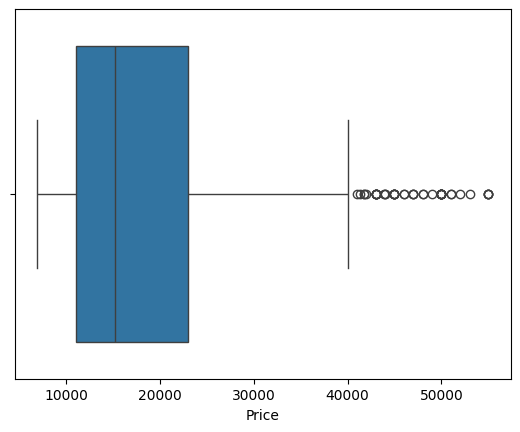

In [33]:
display(sns.boxplot(dfq['Price'],orient="h"))

<ipython-input-34-16d659c35474>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfq['Price'])


<Axes: xlabel='Price', ylabel='Density'>

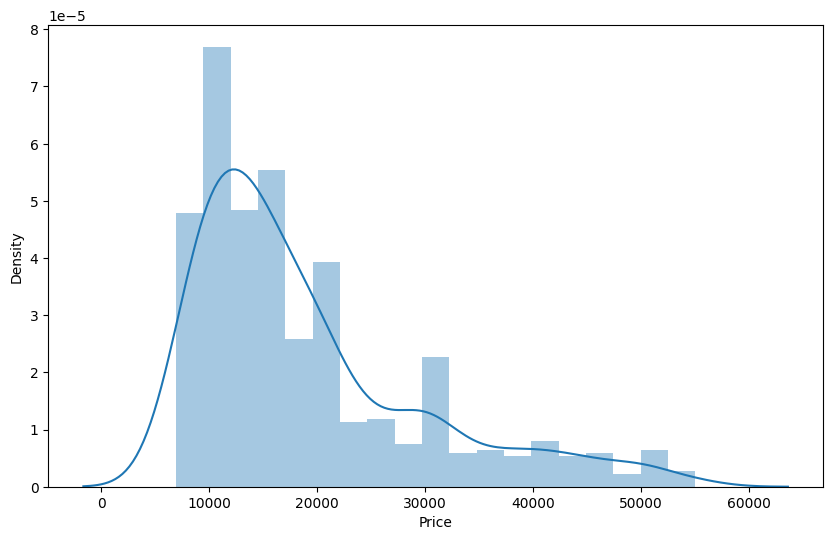

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(dfq['Price'])

In [35]:
# Sort the DataFrame by Price in descending order
df_sorted = dfq.sort_values(by='Price', ascending=False)# bar plot for N ame and Price in y axis
# Get the top 10 prices and corresponding product names
top_10_prices = df_sorted['Price'].head(10)
top_10_names = df_sorted['Name'].head(10)

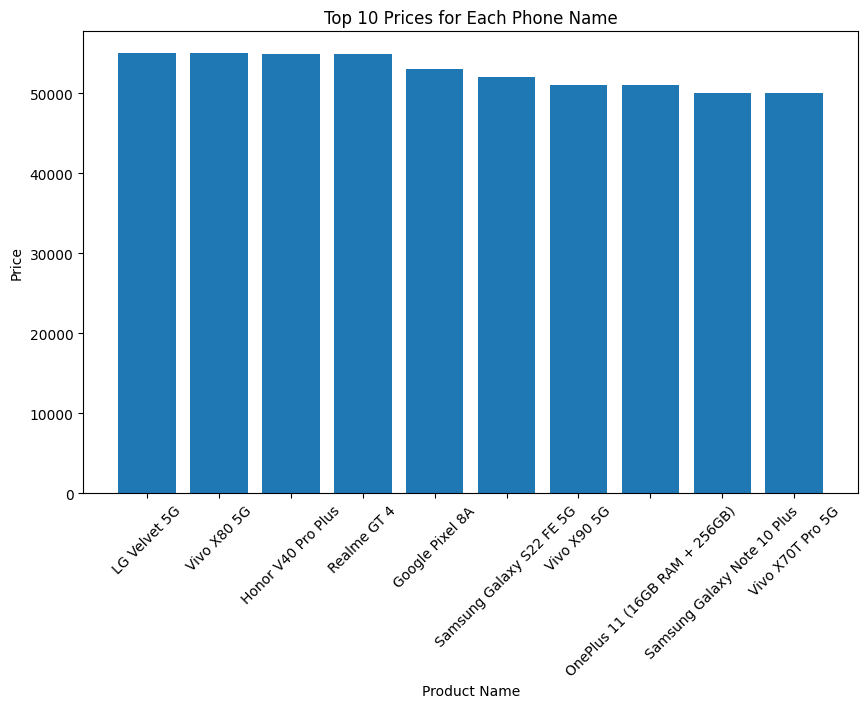

In [36]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, top_10_prices)
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Top 10 Prices for Each Phone Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

<Axes: xlabel='Android_version'>

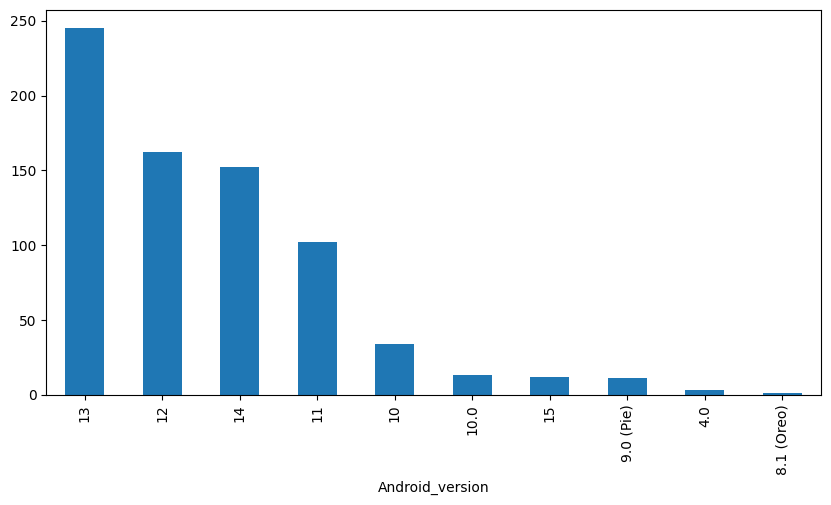

In [37]:
dfq.Android_version.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='company'>

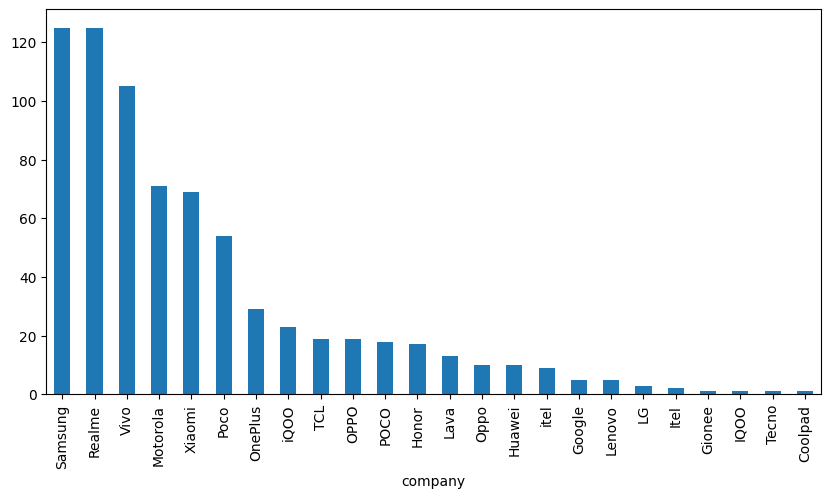

In [38]:
dfq.company.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5),)

In [ ]:
dfq.info()

In [39]:
numeric_cols = dfq.select_dtypes(include=[np.number])
numeric_cols

,Rating,Spec_score,Price
0,4.650,68,9999.000
1,4.200,63,9990.000
2,4.300,75,11999.000
3,4.100,69,11999.000
4,4.400,75,11990.000
5,4.100,76,11990.000
6,4.100,71,11990.000
7,4.050,75,11599.000
8,4.500,75,12298.000
9,4.250,85,14999.000


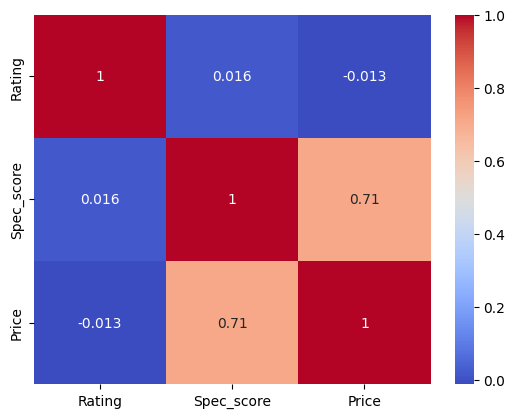

In [40]:
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

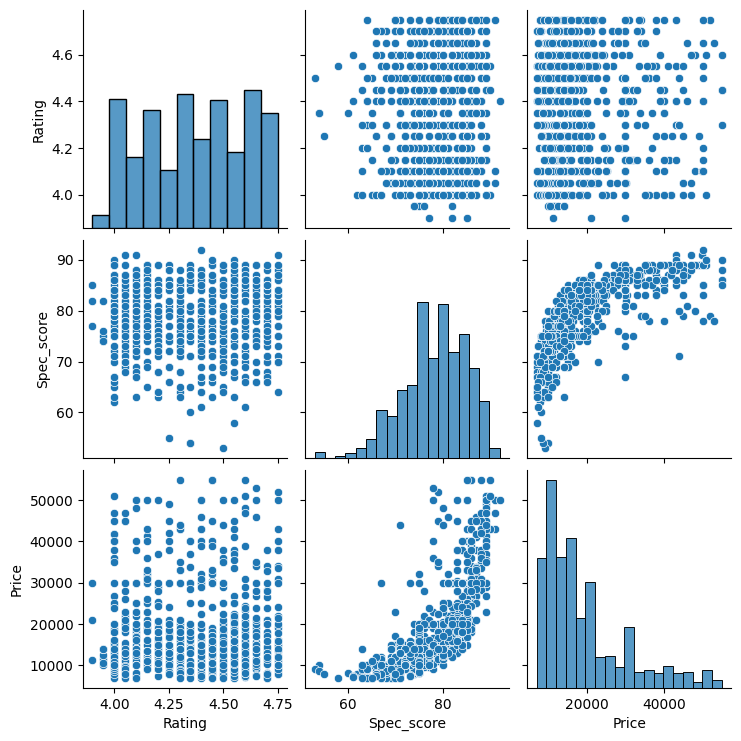

In [41]:
# create pairplot
sns.pairplot(dfq)

In [42]:
# Data preprocessing
#dfdummies = pd.get_dummies(dfq,dtype=int)
#dfdummies.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfdummies = dfq.copy()
for col in dfdummies.columns:
    if dfdummies[col].dtype == 'object':
        dfdummies[col] = le.fit_transform(dfdummies[col])


In [44]:
dfdummies.head()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Price
0,436,4.650,68,1,5,35,27,96,7,4,17,1,10,45,5,46,9999.000
1,383,4.200,63,3,2,6,12,31,10,0,17,3,4,51,0,84,9990.000
2,385,4.300,75,3,5,25,27,136,7,3,17,5,10,20,1,84,11999.000
3,374,4.100,69,3,5,25,18,27,7,2,17,5,4,55,4,80,11999.000
4,458,4.400,75,1,6,25,18,98,7,3,17,1,4,53,4,18,11990.000


In [45]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [50]:
df_scaled = dfdummies.copy()


In [51]:
df_scaled

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Price
0,436,4.650,68,1,5,35,27,96,7,4,17,1,10,45,5,46,9999.000
1,383,4.200,63,3,2,6,12,31,10,0,17,3,4,51,0,84,9990.000
2,385,4.300,75,3,5,25,27,136,7,3,17,5,10,20,1,84,11999.000
3,374,4.100,69,3,5,25,18,27,7,2,17,5,4,55,4,80,11999.000
4,458,4.400,75,1,6,25,18,98,7,3,17,1,4,53,4,18,11990.000
5,468,4.100,76,3,5,35,12,73,10,2,17,5,4,7,4,53,11990.000
6,384,4.100,71,3,5,25,18,77,6,0,17,5,4,52,4,80,11990.000
7,388,4.050,75,1,5,25,27,92,7,4,17,5,4,18,4,46,11599.000
8,456,4.500,75,3,6,35,27,111,7,3,17,1,4,16,4,42,12298.000
9,444,4.250,85,1,7,35,18,116,1,4,17,1,10,5,4,44,14999.000


In [52]:
df_scaled = pd.DataFrame(df_scaled, columns=dfdummies.columns)
df_scaled.head()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Price
0,436,4.650,68,1,5,35,27,96,7,4,17,1,10,45,5,46,9999.000
1,383,4.200,63,3,2,6,12,31,10,0,17,3,4,51,0,84,9990.000
2,385,4.300,75,3,5,25,27,136,7,3,17,5,10,20,1,84,11999.000
3,374,4.100,69,3,5,25,18,27,7,2,17,5,4,55,4,80,11999.000
4,458,4.400,75,1,6,25,18,98,7,3,17,1,4,53,4,18,11990.000


In [53]:
y = df_scaled['Price']
X = df_scaled.drop('Price', axis=1)

In [55]:
display(X.shape)
display(y.shape)

(735, 16)

(735,)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [58]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Construct model
lm=LinearRegression()

In [59]:
# fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
# predicted estimation
y_pred = lm.predict(X_test)

In [63]:
# This is intercept of the line (Also known as bias co-efficient)
intercept = lm.intercept_
# This is slope (m) of the line y=mx+c (Also known as relevant variable's co-efficient)
slope = lm.coef_


In [78]:
display(intercept)
display(slope)

-85678.6025218595

array([ 1.56465403e+01, -1.14662655e+03,  1.29245756e+03, -1.10686475e+03,
       -1.04936896e+03, -4.16043556e+02,  7.61455427e+01, -1.23138946e+00,
        1.80341138e+02, -1.75803686e+02, -6.55872343e+02,  2.39911388e+02,
        3.61384245e+01,  9.49987851e+01,  6.12195982e+03,  1.81359656e+01])

In [72]:
# Percentage of target values explained by the features
rsquared = lm.score(X_test, y_test)
# RMSE : Average error in prediction
#mean_squared_error(y_test, y_pred, squared=False)
# Prediction of specific range


0.5823676142744266 0.07929199911028786 [0.46988121 0.65903123]


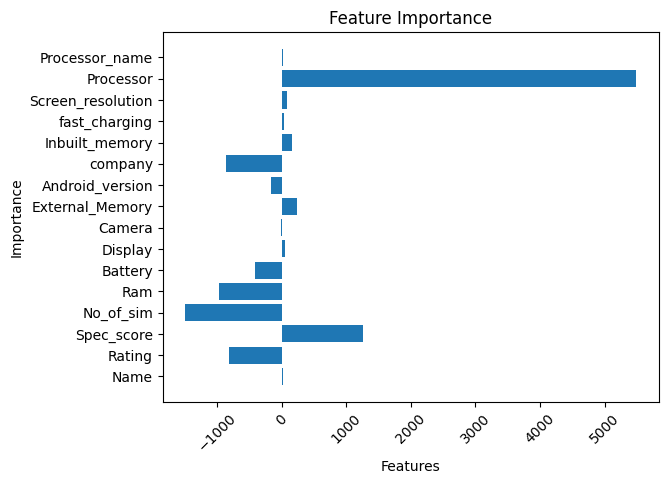

In [77]:
# Do k-fold cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(lm, X_train, y_train, cv=kf)
# Mean, std and confidence interval of the cross-validation
print(np.mean(cv_results), np.std(cv_results), np.quantile(cv_results, [0.025, 0.975]))

# Visualize Feature importance
names = X.columns
importance = lm.fit(X, y).coef_
plt.barh(names, importance, align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

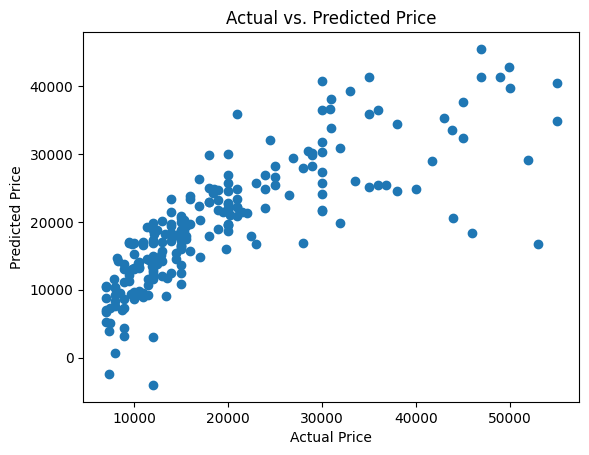

In [79]:
# plot regression line
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

In [83]:
plt.plot(X, lm.predict(X.values.reshape(-1, 1)), color='red')
plt.title('Actual vs. Predicted Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 16 features as input.

In [86]:
X.values.reshape(-1, 1).shape

(11760, 1)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

In [88]:
print(model.n_features_in_)  # For sklearn 0.24+

NameError: name 'model' is not defined